## DATA SCIENCE AND BUSINESS ANALYTICS INTERN AT THE SPARKS FOUNDATION 

## Task 2: Prediction using Unupervised ML

## Submitted by: Laxman Parab

### Problem Statement: To predict the optimum number of clusters of Iris dataset and represent it visually.

##### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Importing Dataset

In [2]:
iris = datasets.load_iris()

In [3]:
#Converting to dataframe
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#Checking for null values

iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

We dont have any null values in our dataset

#### Finding the optimum number of clusters for k-means classification and also determine the value of K

In [5]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

wcss = []                                             #Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Within-Cluster Sum of Square')

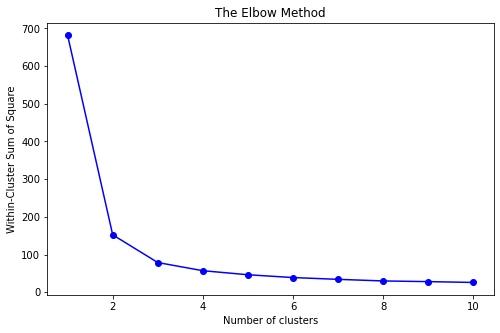

In [6]:
# Plotting the "within-cluster sum of square" against clusters range using 'Elbow Method'

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')

In [7]:
#Creating k means classifier by applying k means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

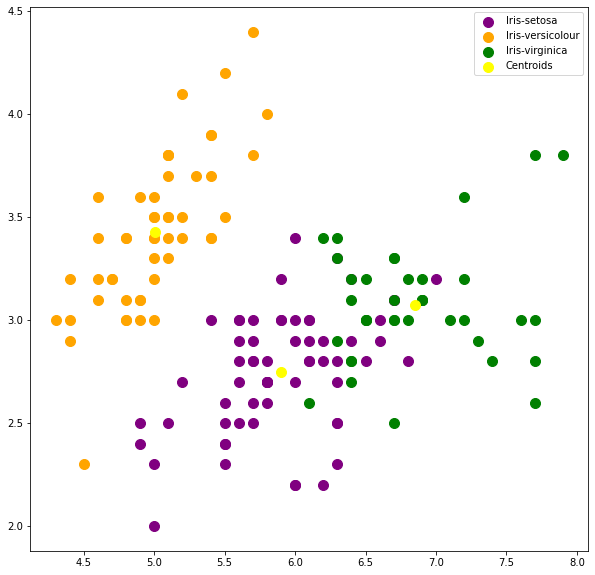

In [8]:
#Plotting the clusters

plt.figure(figsize = (10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [9]:
#Labelling the predictions and adding the prediction to the dataset

y_kmeans = np.where(y_kmeans=='0', 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)

data_with_clusters = iris_df.copy()
data_with_clusters["Cluster"] = y_kmeans


<AxesSubplot:ylabel='Cluster'>

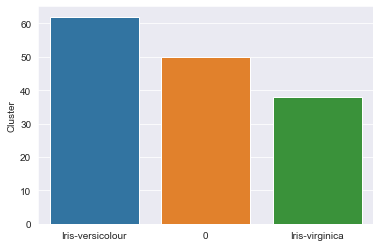

In [10]:
#Visualizing the data using a bar plot
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts())

There are around 62 iris-versicolour, 50 Iris-virginica and roughly 38 Iris-setosa samples in the dataset 